In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
import meta.conf_train as conf_train
import matplotlib
import matplotlib.dates as mdates
import matplotlib.axes as ax
import meta.conf_nilm as conf_nilm

MOVING_AVG_DIST = 50
COLORS = {'rnn':'#1f77b4', 'rnn_e':'#ff7f0e', 'adam':'#2ca02c', 'sgd':'black', 'momentum':'#9467bd', 'adagrad':'#7f7f7f', 'adadelta':'#bcbd22', 'rmsprop':'#17becf', 'dm':'grey', 'dm_e':'black', 'dm_i':'#d62728'}

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

def _plot_results_avg(results, error_bars=False, title='', name=''):
    
    plt.figure(figsize=(21, 9))
    plt.ylim(0, 1.5)
    if error_bars:
        for n, r in results.items(): 
            average = np.mean(r, axis=0)
            error = np.std(r, axis=0)
            maxs = np.convolve(average + error, np.ones(MOVING_AVG_DIST)/MOVING_AVG_DIST, mode='valid')
            mins = np.convolve(average - error, np.ones(MOVING_AVG_DIST)/MOVING_AVG_DIST, mode='valid')
            average = np.convolve(average, np.ones(MOVING_AVG_DIST)/MOVING_AVG_DIST, mode='valid')
            yerr = np.convolve(error, np.ones(MOVING_AVG_DIST)/MOVING_AVG_DIST, mode='valid')

            plt.errorbar(range(len(maxs)), average, yerr=yerr, alpha=0.2,  color=COLORS[n])
    #         plt.fill_between(range(len(maxs)), mins, maxs, alpha=0.5, color=COLORS[n])
    #         plt.plot(mins, linestyle='dotted', linewidth='1', alpha=0.5, color=COLORS[n])
    #         plt.plot(maxs, linestyle='dotted', linewidth='1', alpha=0.5, color=COLORS[n])
    #         plt.plot(average, label=n, linewidth='2')
    for n, r in results.items(): 
        average = np.mean(r, axis=0)
        average = np.convolve(average, np.ones(MOVING_AVG_DIST)/MOVING_AVG_DIST, mode='valid')
        plt.plot(average, label=n, linewidth='2', color=COLORS[n])
    plt.legend()
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title(title)
    plt.savefig('plots/' + name + "_avg.svg")
    plt.show()
    
    
def _plot_first_run(results):
    plt.figure(figsize=(12, 6))
    for n, r in results.items(): 
        plt.plot(np.convolve(r[1], np.ones(MOVING_AVG_DIST)/MOVING_AVG_DIST, mode='valid'), label=n, linewidth='1.5', color=COLORS[n])
#             plt.plot(r[i], label=n, linewidth='2')
        plt.ylim(0, 1.2)
    plt.legend()
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.savefig('plots/' + "single.svg")
    plt.show()
    
def _plot_single_results_avg(results, title='', name=''):
    
    plt.figure(figsize=(21, 16))
    for n, r in results.items(): 
        for i in range(len(r)):
#             plt.ylabel('Loss')
#             plt.xlabel('Steps')
            plt.subplot(3, 3, i+1)
            plt.title('Run #'+ str(i+1))
            plt.plot(np.convolve(r[i], np.ones(MOVING_AVG_DIST)/MOVING_AVG_DIST, mode='valid'), label=n, linewidth='1.5', color=COLORS[n])
#             plt.plot(r[i], label=n, linewidth='2')
            plt.ylim(0, 1.2)
    plt.legend()
#     plt.title(title)
    plt.savefig('plots/' + name + "_singles.svg")
    plt.show()
    
def _plot_validation_results(results):
    plt.figure(figsize=(10, 9))
    plt.xlabel('Validation Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 1.2)
    for n, r in results.items(): 
        plt.plot(r, label=n, linewidth='2')
    plt.legend()
    plt.show()
    
    
def _make_nilm_subplots(results):
    font = {'family' : 'normal',
        'size'   : 12}
    matplotlib.rc('font', **font)
    myFmt = mdates.DateFormatter('%d.')
    plt.gca().xaxis.set_major_formatter(myFmt)
    
    plt.figure(figsize=(36, 6))
    i = 1
    for opt, data in results.items():
        plt.subplot(1, 3, i)
        plt.title(opt)
        for label, values in data.items():
            plt.plot(values[conf_nilm.DISPLAY_DETAIL_TIME['start_time'] : conf_nilm.DISPLAY_DETAIL_TIME['end_time']], label=label)
        plt.ylim(0, 1000)
        i += 1
    plt.xlabel('Time')
    plt.ylabel('Power (W)')
    plt.legend()
    plt.show()
        
    
    
def _make_nilm_plots(data, name):
    font = {'family' : 'normal',
        'size'   : 16}
    matplotlib.rc('font', **font)
    myFmt = mdates.DateFormatter('%d')
    plt.gca().xaxis.set_major_formatter(myFmt)
    
    plt.figure(figsize=(100, 12))
    for label, values in data.items():
        plt.plot(values, label=label)
    plt.title(name)
    plt.legend(fontsize=40)
    plt.ylim(0, 1500)
    plt.xlabel('Time', fontsize=40)
    plt.ylabel('Power (W)', fontsize=40)
    plt.savefig(conf_nilm.OUTPUT_PATH + name + '.png')
    plt.show()

    plt.figure(figsize=(12, 6))
    for label, values in data.items():
        plt.plot(values[conf_nilm.DISPLAY_DETAIL_TIME['start_time'] : conf_nilm.DISPLAY_DETAIL_TIME['end_time']], label=label)
    plt.title(name)
    plt.legend()
    plt.ylim(0, 1200)
    plt.xlabel('Time')
    plt.ylabel('Power (W)')
    plt.show()


In [3]:
nilm_results = {
         'rnn': pd.read_pickle('meta/results/2_nilm/fridge/rnn_base_fridge_nilm_results.pickle'),
        'rnn_e': pd.read_pickle('meta/results/2_nilm/fridge/rnn_e_base_nb2_fridge_nilm_results.pickle'),
        'adam': pd.read_pickle('meta/results/2_nilm/fridge/adam_fridge_nilm_results.pickle'),
}

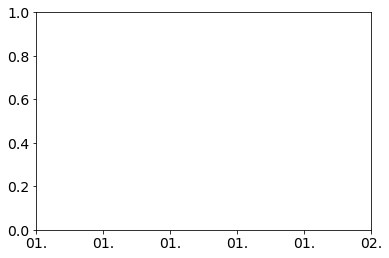

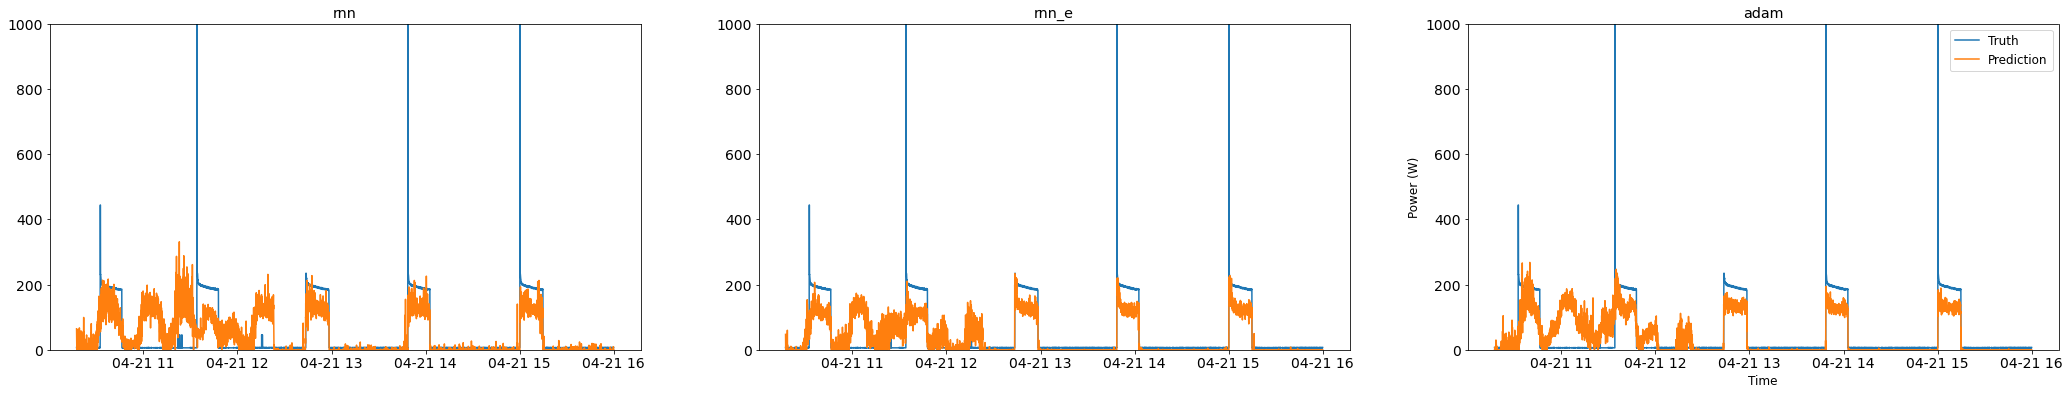

In [36]:
_make_nilm_subplots(nilm_results)

In [10]:
results = {
    # LONG REDD FRIDGE
#         'rnn': pd.read_pickle('meta/results/1_eval_final/long_redd/fridge/rnn_base_full.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/long_redd/fridge/rnn_e_base_full.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/long_redd/fridge/adam_full.pickle-nilm_seq'),
    # DISH WASHER
        'rnn': pd.read_pickle('meta/results/1_eval_final/dish/dish washer/rnn_base_eval_loss_record.pickle-nilm_seq'),
        'rnn_e': pd.read_pickle('meta/results/1_eval_final/dish/dish washer/rnn_e_base_nb2_eval_loss_record.pickle-nilm_seq'),
        'adam': pd.read_pickle('meta/results/1_eval_final/dish/dish washer/adam_eval_loss_record.pickle-nilm_seq'),
    
    
    # BASE REDD FRIDGE
#         'rnn': pd.read_pickle('meta/results/1_eval_final/base/fridge/rnn_base_eval_loss_record.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/base/fridge/rnn_e_base_nb2_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/base/fridge/adam_eval_loss_record.pickle-nilm_seq'),
    # APPL REDD FRIDGE
#         'rnn': pd.read_pickle('meta/results/1_eval_final/appls/fridge/rnn_appls_eval_loss_record.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/appls/fridge/rnn_e_appls_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/appls/fridge/adam_eval_loss_record.pickle-nilm_seq'),
    # DATA REDD FRIDGE
#         'rnn': pd.read_pickle('meta/results/1_eval_final/data/fridge/rnn_data_eval_loss_record.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/data/fridge/rnn_e_data_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/data/fridge/adam_eval_loss_record.pickle-nilm_seq'),
    # BOTH REDD FRIDGE
#         'rnn': pd.read_pickle('meta/results/1_eval_final/both/fridge/rnn_both_eval_loss_record.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/both/fridge/rnn_e_both_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/both/fridge/adam_eval_loss_record.pickle-nilm_seq'),
    
    
    
    # BASE iAWE fridge
#         'rnn': pd.read_pickle('meta/results/1_eval_final/base_iAWE/fridge/rnn_base_full.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/base_iAWE/fridge/rnn_e_base_full.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/base_iAWE/fridge/adam_full.pickle-nilm_seq'),
    # APPL iAWE fridge
#         'rnn': pd.read_pickle('meta/results/1_eval_final/appls_iAWE/fridge/rnn_appls_full.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/appls_iAWE/fridge/rnn_e_appls_full.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/appls_iAWE/fridge/adam_full.pickle-nilm_seq'),
    # DATA iAWE fridge
#         'rnn': pd.read_pickle('meta/results/1_eval_final/data_iAWE/fridge/rnn_data_full.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/data_iAWE/fridge/rnn_e_data_full.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/data_iAWE/fridge/adam_full.pickle-nilm_seq'),
    # BOTH iAWE fridge
#         'rnn': pd.read_pickle('meta/results/1_eval_final/both_iAWE/fridge/rnn_both_full.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/both_iAWE/fridge/rnn_e_both_full.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/both_iAWE/fridge/adam_full.pickle-nilm_seq'),
    
    
    # BASE iAWE AC
#         'rnn': pd.read_pickle('meta/results/1_eval_final/base_iAWE/air conditioner/rnn_base_full.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/base_iAWE/air conditioner/rnn_e_base_full.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/base_iAWE/air conditioner/adam_full.pickle-nilm_seq'),
    # APPL iAWE AC
#         'rnn': pd.read_pickle('meta/results/1_eval_final/appls_iAWE/air conditioner/rnn_appls_full.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/appls_iAWE/air conditioner/rnn_e_appls_full.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/appls_iAWE/air conditioner/adam_full.pickle-nilm_seq'),
    # DATA iAWE AC
#         'rnn': pd.read_pickle('meta/results/1_eval_final/data_iAWE/air conditioner/rnn_data_full.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/data_iAWE/air conditioner/rnn_e_data_full.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/data_iAWE/air conditioner/adam_full.pickle-nilm_seq'),
    # BOTH iAWE AC
#         'rnn': pd.read_pickle('meta/results/1_eval_final/both_iAWE/air conditioner/rnn_both_full.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/both_iAWE/air conditioner/rnn_e_both_full.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/both_iAWE/air conditioner/adam_full.pickle-nilm_seq'),
}
for n, r in results.items():
    print(len(r))

9
9
9


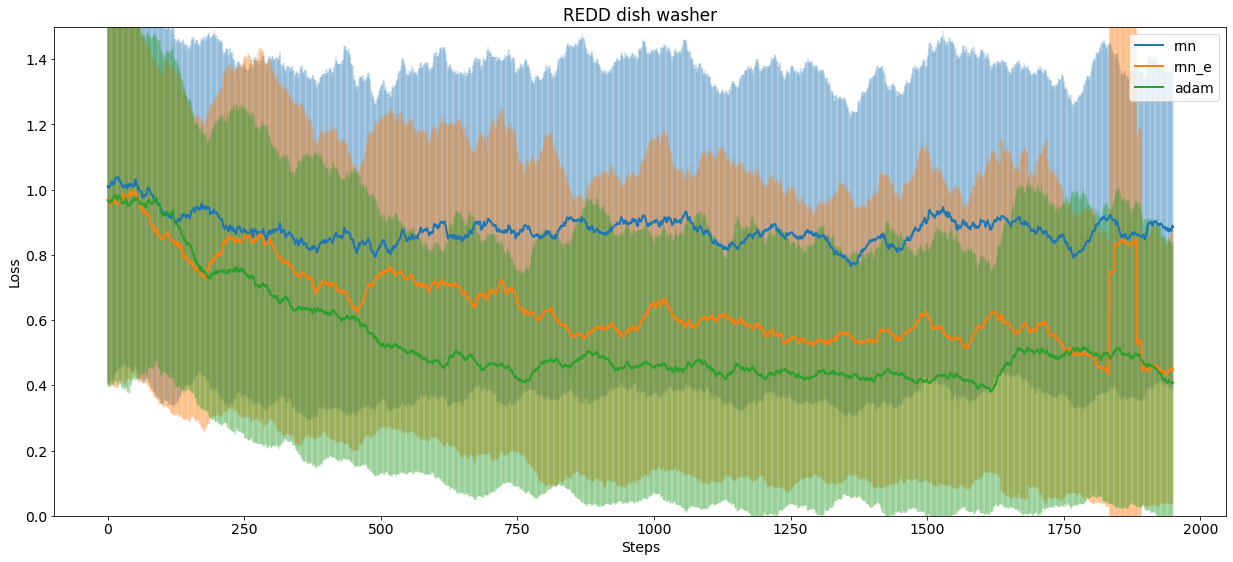

In [11]:
_plot_results_avg(results, error_bars=True, name='dish', title='REDD dish washer') 
# _plot_single_results_avg(results, name='dish')
# _plot_first_run(results)

In [ ]:
results = {
    # ---------------- BATCH ---------------- #
#         'sgd': pd.read_pickle('meta/results/1_eval/batch/fridge/sgd_eval_loss_record.pickle-nilm_seq'),
#         'momentum': pd.read_pickle('meta/results/1_eval/batch/fridge/momentum_eval_loss_record.pickle-nilm_seq'),
#         'adagrad': pd.read_pickle('meta/results/1_eval/batch/fridge/adagrad_eval_loss_record.pickle-nilm_seq'),
#         'adadelta': pd.read_pickle('meta/results/1_eval/batch/fridge/adadelta_eval_loss_record.pickle-nilm_seq'),
#         'rmsprop': pd.read_pickle('meta/results/1_eval/batch/fridge/rmsprop_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval/batch/fridge/adam_eval_loss_record.pickle-nilm_seq'),
    
#         'rnn': pd.read_pickle('meta/results/1_eval/fridge/rnn_base_b_eval_loss_record.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval/fridge/rnn_e_base_b_eval_loss_record.pickle-nilm_seq'),
#         'dm': pd.read_pickle('meta/results/1_eval/fridge/dm_base_b_eval_loss_record.pickle-nilm_seq'),
#         'dm_e': pd.read_pickle('meta/results/1_eval/fridge/dm_e_base_b_eval_loss_record.pickle-nilm_seq'),
#         'dm_i': pd.read_pickle('meta/results/1_eval/fridge/dm_i_base_b_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval/fridge/adam_eval_loss_record.pickle-nilm_seq'),
    
    
    
    # ---------------- NO BATCH ---------------- #
#         'sgd': pd.read_pickle('meta/results/1_eval/fridge/sgd_eval_loss_record.pickle-nilm_seq'),
#         'momentum': pd.read_pickle('meta/results/1_eval/fridge/momentum_eval_loss_record.pickle-nilm_seq'),
#         'adagrad': pd.read_pickle('meta/results/1_eval/fridge/adagrad_eval_loss_record.pickle-nilm_seq'),
#         'adadelta': pd.read_pickle('meta/results/1_eval/fridge/adadelta_eval_loss_record.pickle-nilm_seq'),
#         'adadelta': pd.read_pickle('meta/results/1_eval/fridge/rmsprop_eval_loss_record.pickle-nilm_seq'),
    
#         'adam': pd.read_pickle('meta/results/1_eval/fridge/adam_base_final.pickle-nilm_seq'),
#         'rnn': pd.read_pickle('meta/results/1_eval/fridge/rnn_base_final.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval/fridge/rnn_e_base_final.pickle-nilm_seq'),
#         'dm': pd.read_pickle('meta/results/1_eval/fridge/dm_base_eval_loss_record.pickle-nilm_seq'),
#         'dm_e': pd.read_pickle('meta/results/1_eval/fridge/dm_e_base_eval_loss_record.pickle-nilm_seq'),
    
#         'rnn': pd.read_pickle('meta/results/1_eval/fridge/rnn_base_final.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval/fridge/rnn_e_base_final.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval/fridge/adam_base_final.pickle-nilm_seq'),
    
    # BASE VAR APPL
#         'rnn': pd.read_pickle('meta/results/1_eval/dish washer/rnn_base_eval_loss_record.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval/dish washer/rnn_e_base_nb2_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval/dish washer/adam_eval_loss_record.pickle-nilm_seq'),
    # BASE VAR DATA
#         'rnn': pd.read_pickle('meta/results/1_eval/task_var/fridge/rnn_base_eval_loss_record.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval/task_var/fridge/rnn_e_base_nb2_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval/task_var/fridge/adam_eval_loss_record.pickle-nilm_seq'),
    # BASE VAR ALL
#         'rnn': pd.read_pickle('meta/results/1_eval/dish washer/rnn_base_eval_loss_record.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval/dish washer/rnn_e_base_nb2_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval/dish washer/adam_eval_loss_record.pickle-nilm_seq'),
    # BASE VAR KETTLE
#         'rnn': pd.read_pickle('meta/results/1_eval/task_var/kettle/rnn_base_eval_loss_record.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval/task_var/kettle/rnn_e_base_nb2_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval/task_var/kettle/adam_eval_loss_record.pickle-nilm_seq'),

    
    # DATA
    
#         'rnn': pd.read_pickle('meta/results/1_eval/fridge/rnn_data_eval_loss_record.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval/fridge/rnn_e_data_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval/fridge/adam_eval_loss_record.pickle-nilm_seq'),
   
    
#         'rnn': pd.read_pickle('meta/results/1_eval/dish washer/rnn_data_eval_loss_record.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval/dish washer/rnn_e_data_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval/dish washer/adam_eval_loss_record.pickle-nilm_seq'),
}



for a, b in results.items():
    print(len(b))
    print(len(b[0]))


In [3]:
rnn = pd.read_pickle('meta/results/1_eval_final/long_redd/fridge/rnn_long_eval_loss_record.pickle-nilm_seq')
rnn_2 = pd.read_pickle('meta/results/1_eval_final/long_redd_b/fridge/rnn_long_eval_loss_record.pickle-nilm_seq')
rnn_3 = pd.read_pickle('meta/results/1_eval_final/long_redd_c/fridge/rnn_long_eval_loss_record.pickle-nilm_seq')
rnn_e = pd.read_pickle('meta/results/1_eval_final/long_redd/fridge/rnn_e_long_eval_loss_record.pickle-nilm_seq')
rnn_e_2 = pd.read_pickle('meta/results/1_eval_final/long_redd_b/fridge/rnn_e_long_eval_loss_record.pickle-nilm_seq')
rnn_e_3 = pd.read_pickle('meta/results/1_eval_final/long_redd_c/fridge/rnn_e_long_eval_loss_record.pickle-nilm_seq')
adam = pd.read_pickle('meta/results/1_eval_final/long_redd/fridge/adam_eval_loss_record.pickle-nilm_seq')
adam_2 = pd.read_pickle('meta/results/1_eval_final/long_redd_b/fridge/adam_eval_loss_record.pickle-nilm_seq')
adam_3 = pd.read_pickle('meta/results/1_eval_final/long_redd_c/fridge/adam_eval_loss_record.pickle-nilm_seq')

rnn_full = rnn + rnn_2 + rnn_3
rnn_e_full = rnn_e + rnn_e_2 + rnn_e_3
adam_full = adam + adam_2 + adam_3

print(len(rnn_full))
print(len(rnn))
print(len(rnn_2))
print(len(rnn_e_full))
print(len(adam_full))

3
1
1
3
3


In [4]:
import pickle

with open('meta/results/1_eval_final/long_redd/fridge/rnn_base_full.pickle-nilm_seq', 'wb') as l_record:
    pickle.dump(rnn_full, l_record)
with open('meta/results/1_eval_final/long_redd/fridge/rnn_e_base_full.pickle-nilm_seq', 'wb') as l_record:
    pickle.dump(rnn_e_full, l_record)
with open('meta/results/1_eval_final/long_redd/fridge/adam_full.pickle-nilm_seq', 'wb') as l_record:
    pickle.dump(adam_full, l_record)